# Modelagem de dispersão

Nesta atividade vocês precisarão implementar o modelo gaussiano no Python. Vocês devem realizar os seguintes tópicos:

- Implementar uma função para determinar a classe de estabilidade de Pasquil para diferentes condições atmosféricas.

- Implementar a função de estimativa de coefiente de dispersão (sigmaYZ) para todas as classes de estabilidade.

- Implementar a função de estimativa de sobrelevação da pluma utilizando os métodos de Davidson-Bryant, Holland e Briggs (quem fizer o método de Briggs ganha um ponto a mais). Deve ser considerado o efeito Tip-Downwash

- Implementar a função do modelo gaussiano

- Realizar simulações com o script criado, utilizando diferentes classes de estabilidade, velocidades do vento, alturas de chaminé. Considere a taxa de emissão que você estimou na primeira atividade. Encontre a altura de chaminé necessária para que as concentrações não violem os padrões da Resolução CONAMA 491.

- Faça figuras e discuta os resultados.

In [28]:
# Criando função de classe de estabilidade de Pasquil

def classePasquill(v,I,cco,cob):
    if cob == 1: # Valor 1 para quando tem cobertura
        classe = 'D'
    elif v < 2:
        if I <= 0:
            classe == 'F'
        elif I > 0 and I < 350:
            classe = 'B'
        elif I >= 350 and I < 700:
            classe = 'A' # Ou B
        else:
            classe = 'A'
    elif v >= 2 and v < 3:
        if I <= 0:
            if cco >=4:
                classe = 'E'
            else:
                classe = 'F'
        elif I > 0 and I < 350:
            classe = 'C'
        elif I >= 350 and I < 700:
            classe = 'B'
        else:
            classe = 'A' # Ou B
    elif v >= 3 and v < 5:
        if I <= 0:
            if cco >=4:
                classe = 'D'
            else:
                classe = 'E'
        elif I > 0 and I < 350:
            classe = 'C'
        elif I >= 350 and I < 700:
            classe = 'B' # Ou C
        else:
            classe = 'B'
    elif v >= 5 and v < 6:
        if I <= 0:
            if cco >=4:
                classe = 'D'
            else:
                classe = 'D'
        elif I > 0 and I < 350:
            classe = 'D'
        elif I >= 350 and I < 700:
            classe = 'C' # Ou D
        else:
            classe = 'C'
    else:
        if I <= 0:
            if cco >=4:
                classe = 'D'
            else:
                classe = 'D'
        elif I > 0 and I < 350:
            classe = 'D'
        elif I >= 350 and I < 700:
            classe = 'D'
        else:
            classe = 'C'
    return classe

In [59]:
# Criando função da estimativa da dispersão lateral e vertical da pluma
def sigmaXY(x,classe,urbOrRural):
    if urbOrRural =='urbano':
        if classe == 'A' or classe == 'B':
            sigmaY = 0.32*x*(1+0.0004*x)**(-0.5) 
            sigmaZ = 0.24*x*(1+0.001*x)**(0.5)
        elif classe == 'C':
            sigmaY = 0.22*x*(1+0.0004*x)**(-0.5) 
            sigmaZ = 0.20*x
        elif classe == 'D':
            sigmaY = 0.16*x*(1+0.0004*x)**(-0.5) 
            sigmaZ = 0.14*x*(1+0.0003*x)**(-0.5)
        elif classe == 'E' or classe == 'F':
            sigmaY = 0.11*x*(1+0.0004*x)**(-0.5) 
            sigmaZ = 0.08*x*(1+0.0015*x)**(-0.5)
        else:
            print('Classe de estabilidade errada.')
    else:
        if classe == 'A':
            sigmaY = 0.22*x*(1+0.0001*x)**(-0.5) 
            sigmaZ = 0.20*x
        elif classe == 'B':
            sigmaY = 0.16*x*(1+0.0001*x)**(-0.5) 
            sigmaZ = 0.12*x
        elif classe == 'C':
            sigmaY = 0.11*x*(1+0.0001*x)**(-0.5) 
            sigmaZ = 0.08*x*(1+0.0002*x)**(-0.5)
        elif classe == 'D':
            sigmaY = 0.08*x*(1+0.0001*x)**(-0.5) 
            sigmaZ = 0.06*x*(1+0.0015*x)**(-0.5)
        elif classe == 'E':
            sigmaY = 0.06*x*(1+0.0001*x)**(-0.5) 
            sigmaZ = 0.03*x*(1+0.0003*x)**(-1)
        elif classe == 'F':
            sigmaY = 0.04*x*(1+0.0001*x)**(-0.5) 
            sigmaZ = 0.016*x*(1+0.0003*x)**(-1)
        else:
            print('Classe de estabilidade errada.')
    return sigmaY,sigmaZ

In [30]:
# Função para estimar o deltaH com base na equação de Davidson-Bryant
def deltaHdavidsonbryant(d,vs,u,Ts,Tamb):
    deltaH = (d*(vs/u)**(1.4))*(1+(Ts-Tamb)/Tamb)
    return deltaH

def deltaHholland(d,vs,u,Ts,Tamb,p,classe):
    if classe == 'A':
        ac = 1.2
    elif classe == 'B':
        ac = 1.1
    elif classe == 'C' or classe == 'D':
        ac = 1
    elif classe == 'E':
        ac = 0.9
    elif classe == 'F':
        ac = 0.8
    else:
        print('Classe de estabilidade errada')
    deltaH = ac*(vs*d/u)*(1.5+(2.68*p*(Ts-Tamb)*d)/(Ts*1000))
    return deltaH

def deltaHbriggs(d,vs,Ts,Tamb,classe,u):
    Fb = 9.8*((d/2)**2)*vs*(1-Tamb/Ts)
    if classe == 'A':
        dodz = -0.02 + 0.0098
    elif classe == 'B':
        dodz = -0.018 + 0.0098 
    elif classe == 'C':
        dodz = -0.016 + 0.0098 
    elif classe == 'D':
        dodz = -0.01 + 0.0098 
    elif classe == 'E':
        dodz = 0.005 + 0.0098 
    elif classe == 'F':
        dodz = 0.028 + 0.0098 
    else:
        print('Classe de estabilidade errada')
    s = (9.8/Tamb)*(dodz)
    if classe == 'A' or classe == 'B' or classe == 'C' or classe == 'D':
        if Fb < 55:
            deltaTc = 0.0297*Ts*(vs**(1/3))/(d**(2/3))
            if deltaTc > (Ts - Tamb):
                deltaH = 3*d*vs/u
            else:
                deltaH = 21.425*Fb**(3/4)/u
        else:
            deltaTc = 0.0057*Ts*(vs**(2/3)/d**(1/3))
            if deltaTc > (Ts - Tamb):
                deltaH = 3*d*vs/u
            else:
                deltaH = 2.6*(Fb/(u*s))**(1/3)
    elif classe == 'E' or classe == 'F':
        deltaTc = 0.019582*Ts*vs*s**(1/2)
        if deltaTc > (Ts - Tamb):
            Fm = (vs**2)*(d**2)*Tamb/(4*Ts) 
            deltaH1 = 1.5*(Fm/(u*s**(1/2)))**(1/3)
            deltaH2 = 3*d*vs/u
            if deltaH1 > deltaH2:
                deltaH = deltaH2
            else:
                deltaH = deltaH1
        else:
            deltaH = 2.6*(Fb/(u*s))**(1/3)
    return deltaH

In [31]:
#Criando uma função do modelo gaussiano
import numpy as np
def modeloGaussiano(qs,sigmaY,sigmaZ,u,y,z,H):
    termo1 = qs/(2*np.pi*sigmaY*sigmaZ*u)
    termo2 = np.exp((-y**2)/(2*sigmaY**2))
    termo3 = np.exp((-(z-H)**2)/(2*sigmaZ**2)) + np.exp((-(z+H)**2)/(2*sigmaZ**2))
    conc = termo1*termo2*termo3
    conc = conc*10**6
    return conc

In [169]:
# Definindo a classe para 50 situações
import random
import pandas as pd

df_dispersao = pd.DataFrame()

velocidades = [1.5,4,6]

v = [random.choice(velocidades) for _ in range(50)] # Varia entre 1, 2.5, 4 e 6
cco = [random.randint(0, 8) for _ in range(50)] # Varia de 0 a 8

I = []

dia_noite = [random.randint(0, 1) for _ in range(50)]
for i in range(len(dia_noite)):
    if dia_noite[i] == 0:
        I.append(random.uniform(1, 1000))# Varia de 0 a 1000
    else:
        I.append(0)

cob = []

for i in range(len(cco)):
    if cco[i] == 8:
        cob.append(1)
    else:
        cob.append(0)

classe = []

for i in range(len(cco)):
    classe.append(classePasquill(v[i],I[i],cco[i],cob[i]))

df_dispersao['Dia(0) ou noite(1)'] = dia_noite
df_dispersao['Velocidade do Vento (m/s)'] = v
df_dispersao['Classe de Pasquill'] = classe

In [170]:
# Criando domínio de modelagem 
x = np.linspace(-1,10000,500)
#print(x)
y = np.linspace(-10000,10000,500)

urbOrRural = 'urbano' # Empreendimento se encontra no meio urbano

# Criando matrizes de x e y
xx,yy = np.meshgrid(x,y)

sigmaYlista = []
sigmaZlista = []

# Estimando o coeficiente de dispersão lateral e vertical
for i in range(len(cco)):
    sigmaY,sigmaZ = sigmaXY(xx,classe[i],urbOrRural)
    sigmaYlista.append(sigmaY)
    sigmaZlista.append(sigmaZ)

df_dispersao['SigmaY (m)'] = sigmaYlista 
df_dispersao['sigmaZ (m)'] = sigmaZlista

In [278]:
#Calculando sobrelevação da pluma

hg = 1500 # altura da chaminé
z = 1.5 # altura do nariz
d = 1 # em metros
vs = 10 # em m/s
Ts = 400 # em Kelvin
Tamb = 293 # em Kelvin

hef = []

for i in range(len(cco)):
    if vs>1.5*v[i]:
        # Estimando a sobrelevação da pluma (deltaH)
        deltaH = deltaHbriggs(d,vs,Ts,Tamb,classe[i],v[i])
        hef.append(hg+deltaH)
    else:
        hef.append(hg +2*d*((vs/v[i])-1.5))

df_dispersao['Altura da chaminé efetiva (m)'] = hef 

In [279]:
'''
A emissão máxima de Partícula filtrável foi de 127.46 g/s
A emissão máxima de NOx foi de 1.96 g/s
A emissão máxima de PM10 foi de 156.09 g/s
'''
qsNOX = 1.96
qsPM10 = 156.09

conc = []

for i in range(len(cco)):
    concentracao = modeloGaussiano(qsPM10,sigmaYlista[i],sigmaZlista[i],v[i],yy,z,hef[i])
    conc.append(concentracao)

df_dispersao['Concentração (ug/m³)'] = conc

In [280]:
# Criando dataframe pra dia e pra noite

df_dia = df_dispersao[df_dispersao['Dia(0) ou noite(1)'] == 0]
df_noite = df_dispersao[df_dispersao['Dia(0) ou noite(1)'] == 1]

conc_max_dia = np.maximum.reduce(df_dia['Concentração (ug/m³)'].to_list())
conc_max_noite = np.maximum.reduce(df_noite['Concentração (ug/m³)'].to_list())

conc_lim_dia = np.max(conc_max_dia)
conc_lim_noite = np.max(conc_max_noite)

print(conc_lim_dia)
print(conc_lim_noite)

20.28932725113495
5.544105153336713


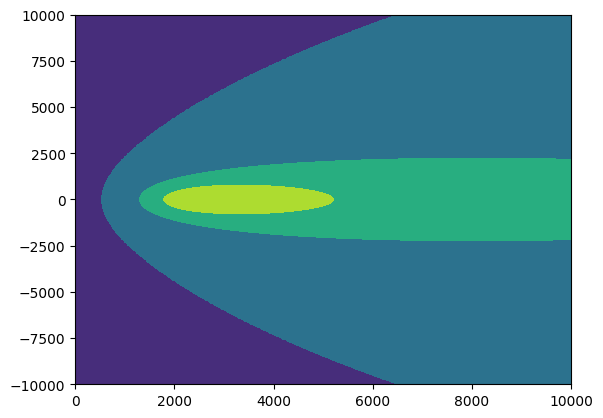

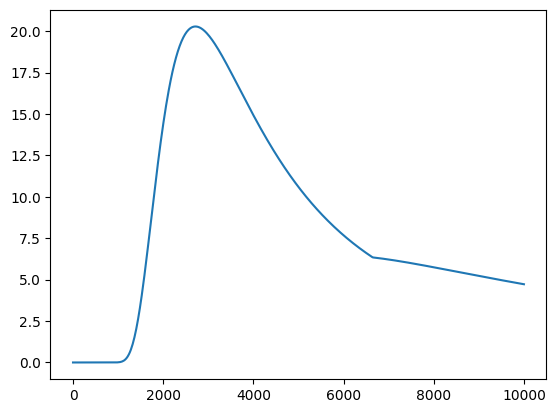

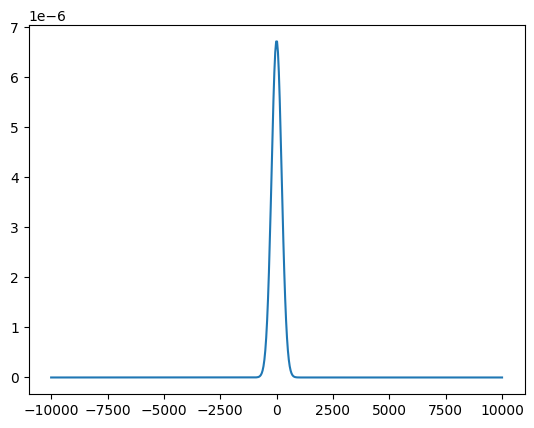

In [283]:
# Visualização dos resultados no espaço
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig,ax = plt.subplots()
ax.contourf(xx,yy,conc_max_dia+0.1,norm = LogNorm())

# Corte em y - sobre o eixo x
fig,ax = plt.subplots()
ax.plot(x,conc_max_dia[250,:])

# Corte em x - sobre o eixo y 
fig,ax = plt.subplots()
ax.plot(y,conc_max_dia[:,40])